In [24]:
from helpers import *

returns = pd.read_excel('data/DailyReturnsConstituents.xlsx', index_col=0, parse_dates=True)
benchmark = pd.read_excel('data/DailyReturnsBenchmark.xlsx', index_col=0, parse_dates=True)
upside_ratio = pd.read_excel('data_copulas/Factor_UpsideRatio.xlsx', index_col=0, parse_dates=True)

stock = 'UPS'

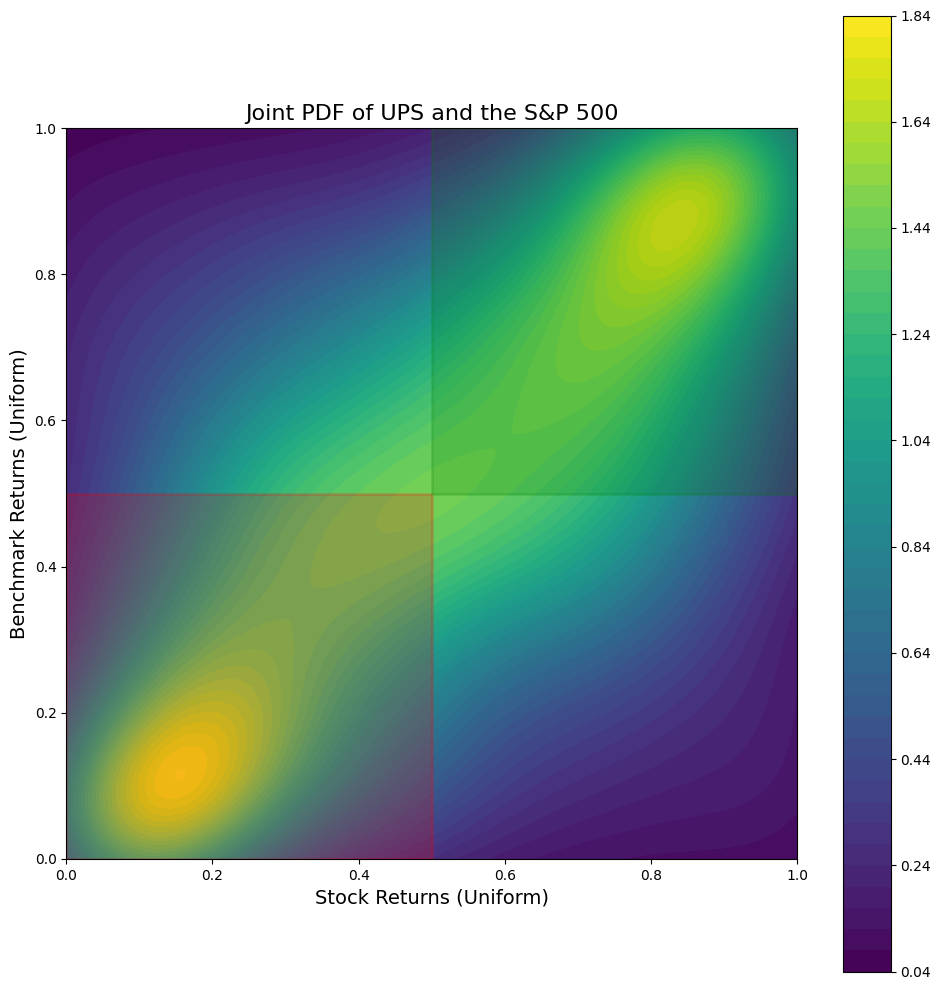

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))

start_returns = returns[stock].first_valid_index()
start_benchmark = benchmark.first_valid_index()
end_returns = returns[stock].last_valid_index()
end_benchmark = benchmark.last_valid_index()

if start_returns is not None and start_benchmark is not None and end_returns is not None and end_benchmark is not None:
    start_date = max(start_returns, start_benchmark)
    end_date = min(end_returns, end_benchmark)
    returns_stock = returns.loc[start_date:end_date, stock]
    benchmark_stock = benchmark.loc[start_date:end_date]

    uni_stock = transform_to_uniform(pd.DataFrame(returns_stock))
    uni_bench_aligned = transform_to_uniform(benchmark_stock)
    stock_data = uni_stock[stock].values.reshape(-1, 1)
    bench_data = uni_bench_aligned.values.reshape(-1, 1)
    joint_data = np.hstack((stock_data, bench_data))

    kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
    kde.fit(joint_data)

    x, y = np.linspace(0, 1, 500), np.linspace(0, 1, 500)
    X, Y = np.meshgrid(x, y)
    xy_grid = np.vstack([X.ravel(), Y.ravel()]).T
    densities = np.exp(kde.score_samples(xy_grid)).reshape(500, 500)

    # Contour plot
    contour = ax.contourf(X, Y, densities, levels=50, cmap='viridis')
    fig.colorbar(contour, ax=ax)
    ax.set_title(f'Joint PDF of {stock} and the S&P 500', fontsize=16)
    ax.set_xlabel('Stock Returns (Uniform)', fontsize=14)
    ax.set_ylabel('Benchmark Returns (Uniform)', fontsize=14)

    # Add colored squares
    ax.add_patch(plt.Rectangle((0, 0), 0.5, 0.5, fill=True, edgecolor='red', facecolor='red', alpha=0.2, lw=2))
    ax.add_patch(plt.Rectangle((0.5, 0.5), 0.5, 0.5, fill=True, edgecolor='green', facecolor='green', alpha=0.2, lw=2))

    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

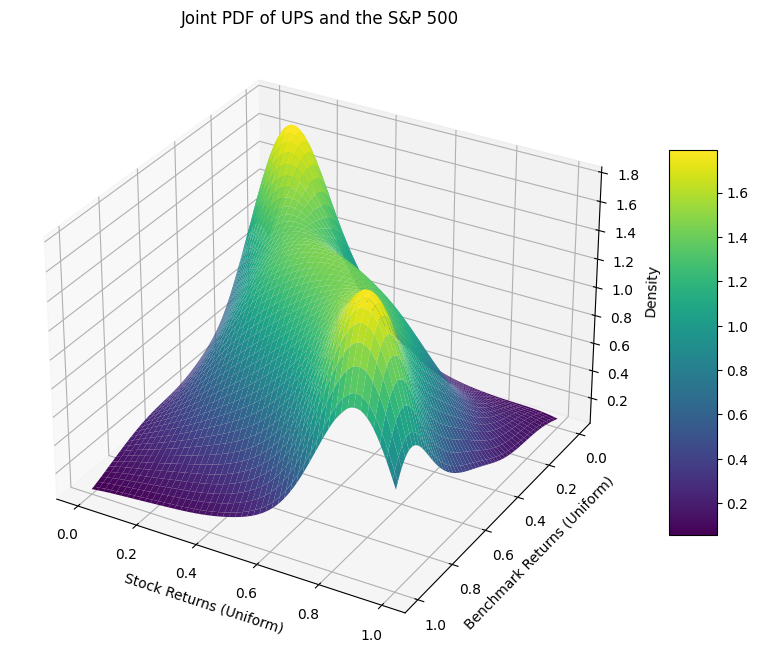

In [26]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

start_returns = returns[stock].first_valid_index()
start_benchmark = benchmark.first_valid_index()
end_returns = returns[stock].last_valid_index()
end_benchmark = benchmark.last_valid_index()

if start_returns is not None and start_benchmark is not None and end_returns is not None and end_benchmark is not None:
    start_date = max(start_returns, start_benchmark)
    end_date = min(end_returns, end_benchmark)
    returns_stock = returns.loc[start_date:end_date, stock]
    benchmark_stock = benchmark.loc[start_date:end_date]

    uni_stock = transform_to_uniform(pd.DataFrame(returns_stock))
    uni_bench_aligned = transform_to_uniform(benchmark_stock)
    stock_data = uni_stock[stock].values.reshape(-1, 1)
    bench_data = uni_bench_aligned.values.reshape(-1, 1)
    joint_data = np.hstack((stock_data, bench_data))

    kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
    kde.fit(joint_data)

    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    X, Y = np.meshgrid(x, y)
    xy_grid = np.vstack([X.ravel(), Y.ravel()]).T
    densities = np.exp(kde.score_samples(xy_grid)).reshape(X.shape)

    surf = ax.plot_surface(X, Y, densities, cmap='viridis', edgecolor='none')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=8)

    ax.set_title(f'Joint PDF of {stock} and the S&P 500')
    ax.set_xlabel('Stock Returns (Uniform)')
    ax.set_ylabel('Benchmark Returns (Uniform)')
    ax.invert_yaxis()
    ax.set_zlabel('Density')

plt.show()

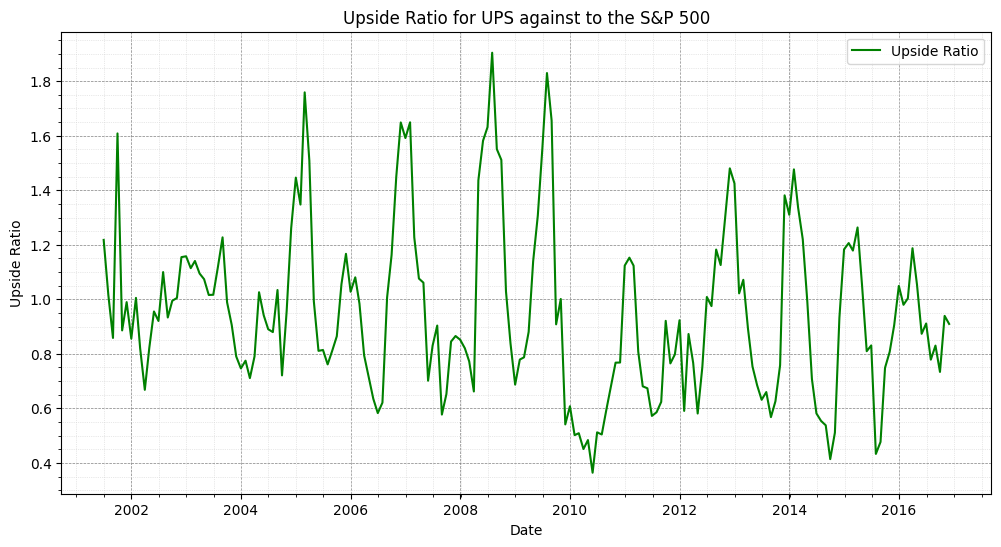

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(upside_ratio["JPM"], label='Upside Ratio', color='green')
ax.set_title(f'Upside Ratio for {stock} against to the S&P 500')
ax.set_xlabel('Date')
ax.set_ylabel('Upside Ratio')
ax.grid(True, which='major', linestyle='--', linewidth='0.5', color='gray')
ax.grid(True, which='minor', linestyle=':', linewidth='0.5', color='lightgray')
ax.minorticks_on()
ax.legend()
plt.show()

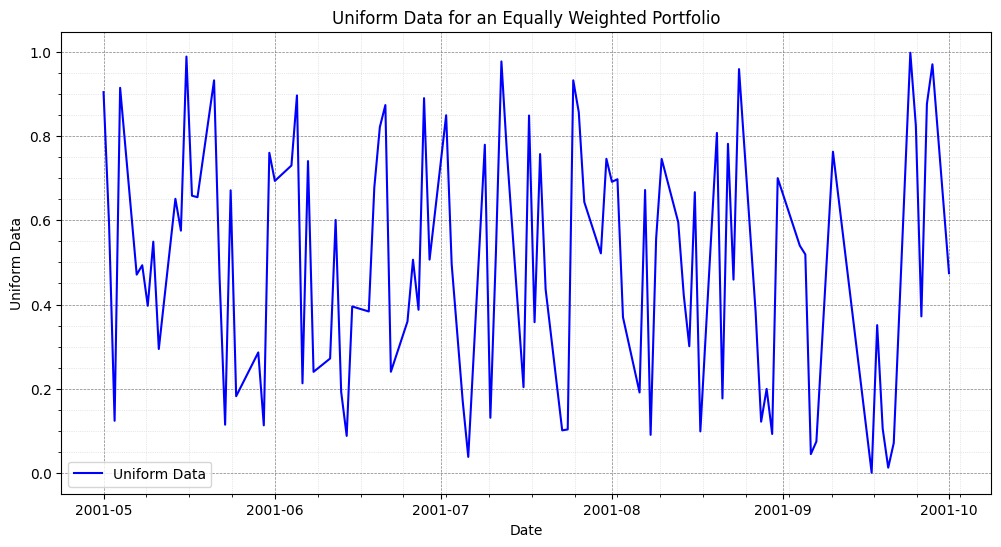

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
uniform_data_example = pd.read_csv('data_uniform/benchmark_2001-11-01.csv', index_col=0, parse_dates=True)
uniform_data_example = uniform_data_example.dropna()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(uniform_data_example, label='Uniform Data', color='blue')
ax.set_title(f'Uniform Data for an Equally Weighted Portfolio')
ax.set_xlabel('Date')
ax.set_ylabel('Uniform Data')
ax.grid(True, which='major', linestyle='--', linewidth='0.5', color='gray')
ax.grid(True, which='minor', linestyle=':', linewidth='0.5', color='lightgray')
ax.minorticks_on()
ax.legend()
plt.show()

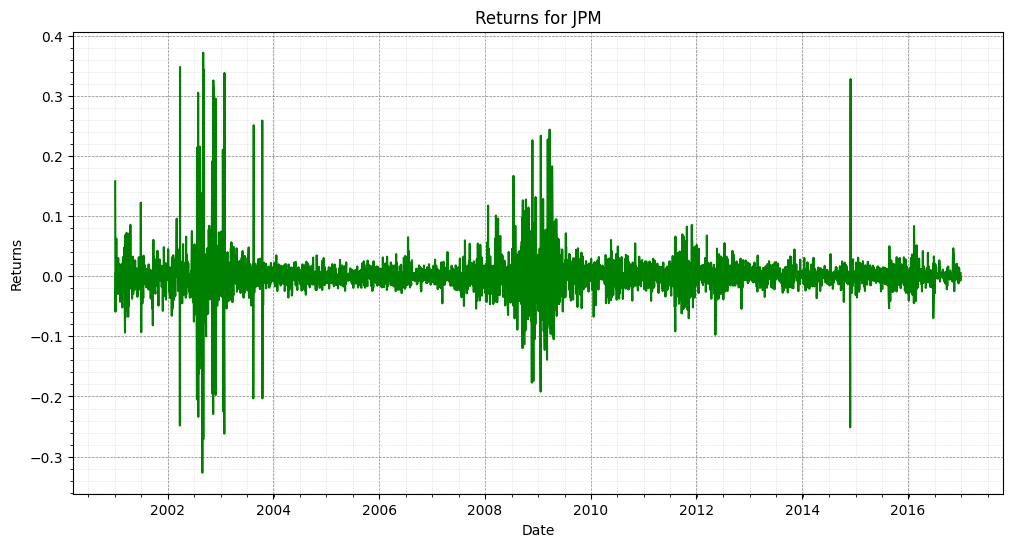

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(returns["JPM"], label='Upside Ratio', color='green')
ax.set_title(f'Returns for {"JPM"}')
ax.set_xlabel('Date')
ax.set_ylabel('Returns')
ax.grid(True, which='major', linestyle='--', linewidth='0.5', color='gray')
ax.grid(True, which='minor', linestyle=':', linewidth='0.5', color='lightgray')
ax.minorticks_on()
#ax.legend()
plt.show()